In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, model_selection, decomposition
from sklearn.metrics import mean_squared_error
import scipy
import os

In [2]:
import pandas as pd

In [3]:
diabetes_df= datasets.load_diabetes()
diabetes_dataFrame = pd.DataFrame(diabetes_df['data'], columns = diabetes_df['feature_names'])
diabetes_dataFrame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [4]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(diabetes_df['data'], diabetes_df['target'])

In [5]:
def preprocessing(tr_input, te_input):
    scaler = sklearn.preprocessing.StandardScaler()
    tr_input = scaler.fit_transform(tr_input)
    te_input = scaler.transform(te_input)
    
    pca = decomposition.PCA(n_components=5)
    pca.fit(tr_input)
    tr_input = pca.transform(tr_input)
    te_input = pca.transform(te_input)

    tr_input = np.insert(tr_input, 0, 1, axis=1)
    te_input = np.insert(te_input, 0, 1, axis=1)
    
    return tr_input, te_input

X_train, X_test = preprocessing(X_train, X_test)

In [6]:
X_test.shape

(111, 6)

In [7]:
def cost_fn(params, input, output):
    params = params.reshape(len(params),-1)
    y_pred = np.dot(input, params)
    mean = np.mean((y_pred - output)**2)
    return mean

In [8]:
def gradient_calc(params, input, output):
    y_pred = np.dot(input, params.T)
    error = y_pred-output
    gradient = input * error
    return gradient

In [9]:
def sgd_linReg(input, output, alpha, iterations):
    M,N = input.shape
    param_vector = np.random.rand(1,N)
    #stocastic gradient descent => finding the optimal weights for each data individually and then by observation
    # we find that the error is as small as possible through batch gradient descent
    i=0
    while i<iterations:
        for j in range(M):
            x = input[j].reshape(-1,N)
            gradient = gradient_calc(param_vector, x, output[j])
            param_vector = param_vector - alpha * gradient
        i += 1
    return param_vector.transpose()

In [10]:
param_test = sgd_linReg(X_train, Y_train, 0.001, 10000)

In [11]:
def predict(X_test):
    print(X_test.shape)
    print(param_test.shape)
    y_pred = X_test @ param_test
    return y_pred

In [12]:
y_pred = predict(X_test)

(111, 6)
(6, 1)


In [13]:
linReg_model = sklearn.linear_model.SGDRegressor(max_iter=10000, tol=1e-3, random_state=0)

In [14]:
print(Y_train.shape)
linReg_model.fit(X_train, Y_train)
print(linReg_model.coef_)
y_sgdPred = linReg_model.predict(X_test)

(331,)
[ 76.48035952  20.15350908  -9.06151699  15.10153283 -28.08068814
  -0.5228036 ]


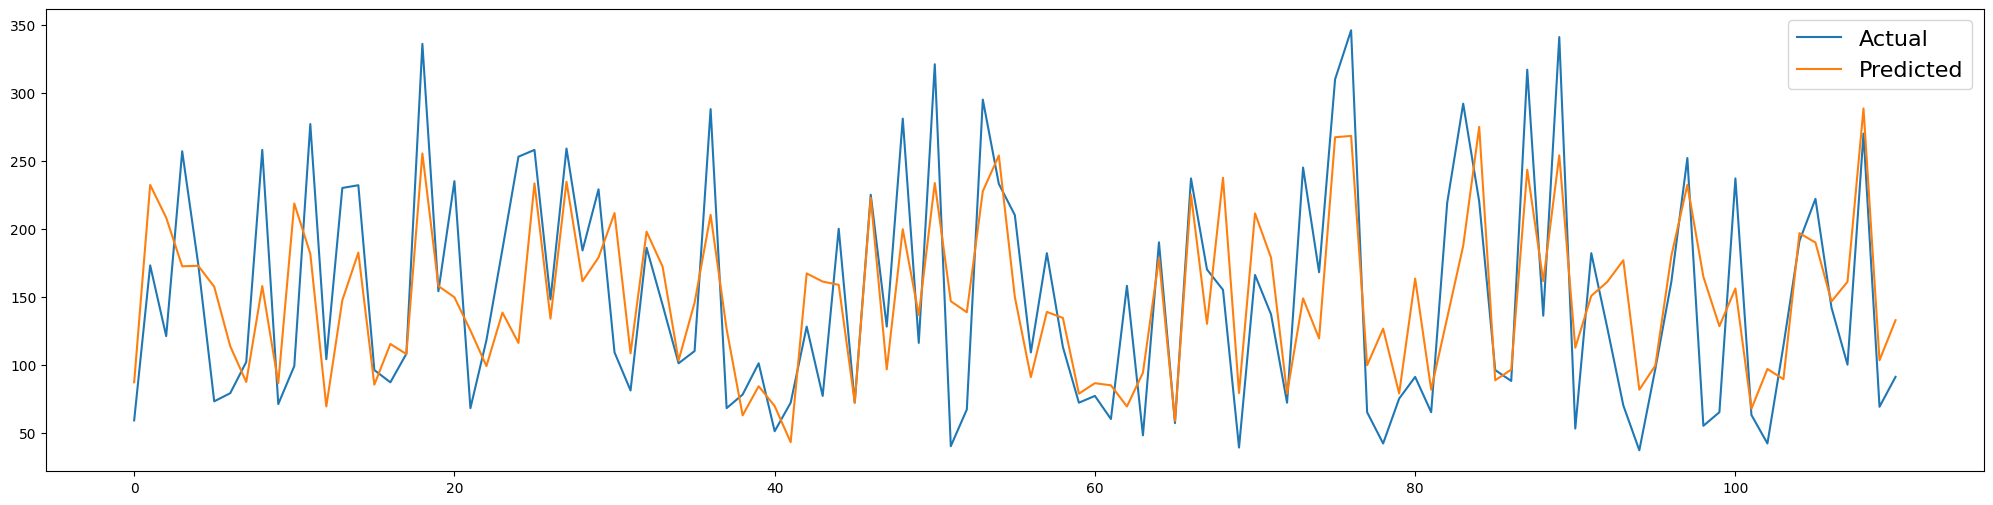

Mean Squared Error : 3072.203019115763
(331, 6)
(6, 1)
Training Accuracy using R-squared:  0.48222444746438464
Testing Accuracy using R-squared:  0.5570954172389669


In [15]:
plt.figure(figsize=(25,6))
plt.plot(Y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, y_pred))

y_trainPred = predict(X_train)
print("Training Accuracy using R-squared: ", sklearn.metrics.r2_score(Y_train, y_trainPred))
print("Testing Accuracy using R-squared: ", sklearn.metrics.r2_score(Y_test, y_pred))

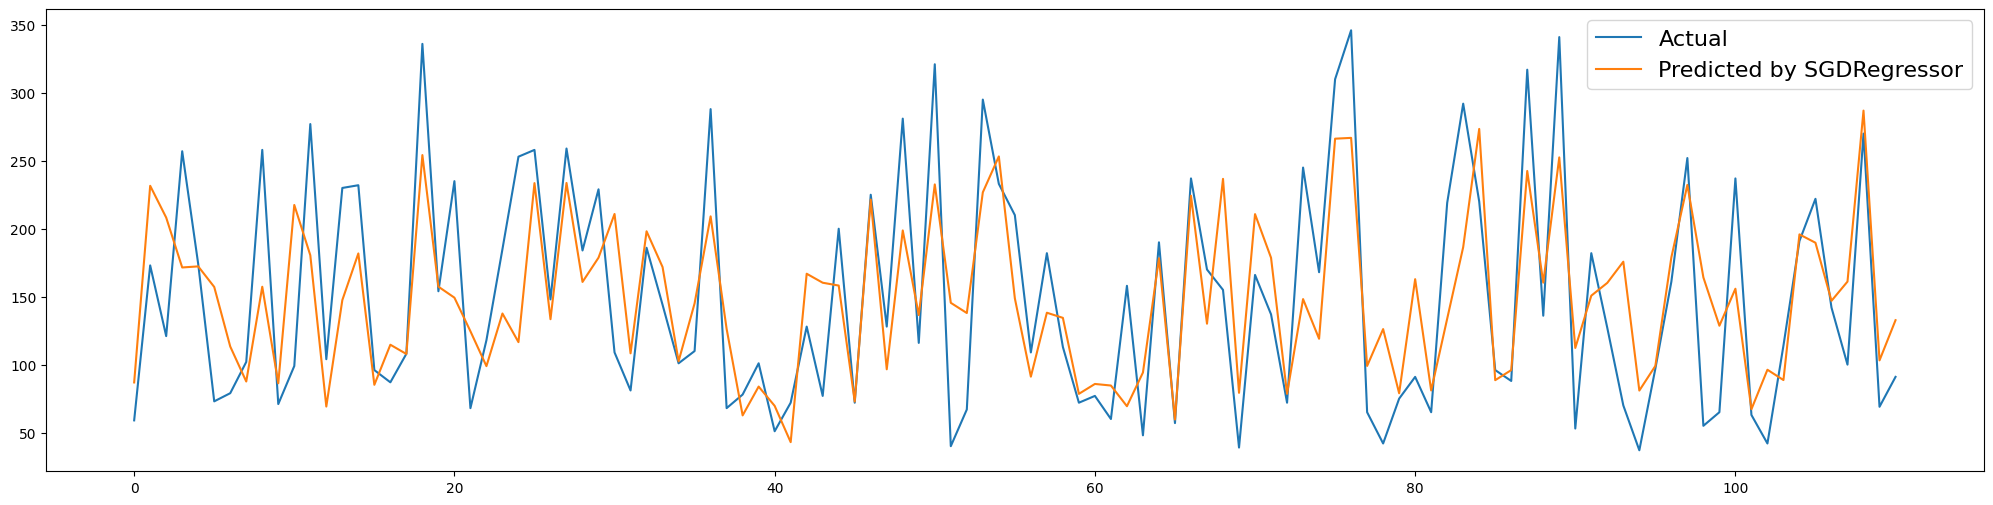

Mean Squared Error : 3076.291869137591
Training Accuracy using R-squared:  0.48227308557077275
Testing Accuracy using R-squared:  0.5565059475972726


In [16]:
plt.figure(figsize=(25,6))
plt.plot(Y_test, label='Actual')
plt.plot(y_sgdPred, label='Predicted by SGDRegressor')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, y_sgdPred))

y_trainPred = linReg_model.predict(X_train)
print("Training Accuracy using R-squared: ", sklearn.metrics.r2_score(Y_train, y_trainPred))
print("Testing Accuracy using R-squared: ", sklearn.metrics.r2_score(Y_test, y_sgdPred))